<a href="https://colab.research.google.com/github/gisimoes2/data-science-projects-womakerscode/blob/main/desafio_individua_probabilidadel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado



probabilidade complementar  = probabilidade de algo -1

quantas pessoas tem na nossa amostra?

quantas pessoas falam ingles no nível avançado

probabilidade de ser fluente em ingles

complemnetar

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats  # o mesmo para outros submódulos

from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import geom


In [ ]:
df = pd.read_csv("populacao_brasileira.csv")
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df.columns

Index(['estado', 'idade', 'escolaridade', 'nível de proficiência em inglês',
       'renda', 'sexo'],
      dtype='object')

In [ ]:
df.shape #descobrir quantas linhas e colunas tem

(1000, 6)

In [ ]:
df.describe() #std = desvio padrão

,idade,renda
count,1000.000000,1000.000000
mean,40.986000,3082.537180
std,13.497852,996.572239
min,18.000000,103.740000
25%,29.000000,2425.815000
50%,42.000000,3076.415000
75%,52.000000,3714.487500
max,64.000000,5632.380000


In [ ]:
df.info() #quais colunas são númericas e quais categoricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   estado                           1000 non-null   object 
 1   idade                            1000 non-null   int64  
 2   escolaridade                     1000 non-null   object 
 3   nível de proficiência em inglês  1000 non-null   object 
 4   renda                            1000 non-null   float64
 5   sexo                             1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [ ]:
df.sort_values('nível de proficiência em inglês')

,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
749,SE,27,Superior,Avançado,3507.99,M
289,SE,42,Superior,Avançado,2477.14,F
903,PI,39,Superior,Avançado,4173.47,M
815,BA,23,Fundamental,Avançado,3759.16,M
284,MS,57,Fundamental,Avançado,5298.90,M
...,...,...,...,...,...,...
480,RN,48,Fundamental,Intermediário,2679.65,F
479,CE,51,Pós-graduação,Intermediário,2516.11,F
473,SE,47,Pós-graduação,Intermediário,3197.60,M
524,MG,27,Fundamental,Intermediário,4148.77,M


In [ ]:
saber_ingles = df['nível de proficiência em inglês'].value_counts()
saber_ingles

nível de proficiência em inglês
Avançado         344
Intermediário    329
Básico           327
Name: count, dtype: int64

1.Considere pessoas fluentes em ingles, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatoria e ela não ser fluente em ingles. Considere fluente quem tem o nível avançado.


In [ ]:
quant_pessoas =  len(df)
quant_fluente_ingles = df[df['nível de proficiência em inglês']== 'Avançado'].shape[0] #o código está contando quantas linhas no DataFrame df têm o valor 'Avançado' na coluna 'nível de proficiência em inglês'. O resultado será armazenado na variável quant_fluente_ingles.
prob_fluente = quant_fluente_ingles/quant_pessoas
print('a probabilidade de ter fluentes em ingles é', ((prob_fluente)*100))

a probabilidade de ter fluentes em ingles é 34.4


In [ ]:
complementar = (1- prob_fluente) * 100
print('valor complementar da probabilidade é',round(complementar,2),'%')



valor complementar da probabilidade é 65.6 %


2)


In [ ]:
dados_AL_PA = df[(df['estado']== 'AL')| (df['estado']=='PA')]

quant_AL_PA = dados_AL_PA.shape[0]
renda_AL_PA = dados_AL_PA[dados_AL_PA['renda'] > 5000].shape[0]
print('probabilidade de pessoas AL e PA terem renda maior que 5000 mil reais é ',round(renda_AL_PA/quant_AL_PA,2))


probabilidade de pessoas AL e PA terem renda maior que 5000 mil reais é  0.05


3)


In [ ]:
dados_AM = df[(df['estado']== 'AM')]
quant_AM = dados_AM.shape[0] #pegar a quantidade de pessoas na região do amapa
superior_AM = dados_AM[(dados_AM['escolaridade']== 'Superior')| (dados_AM['escolaridade']=='Pós-graduação')]
quant_superior_AM = superior_AM.shape[0]

proporcao_ensino_superior_AM = quant_superior_AM/quant_AM



In [ ]:
complementar = 1 - proporcao_ensino_superior_AM
probabilidade_final = (complementar**4)*quant_superior_AM
print(probabilidade_final)


0.8411638377544675


4)


In [ ]:
intervalo = 1500
faixas_renda = np.arange(0, df['renda'].max() + intervalo, intervalo)
contagem_por_faixa, _ = np.histogram(df['renda'],bins = faixas_renda)

faixa_predominante = np.argmax(contagem_por_faixa) = intervalo
print("faixa de renda predominante:", faixa_predominante, "-", faixa_predominante + intervalo)

plt.hist(df['renda'],bins = faixas_renda)
plt.title('Histograma- Função densidade de probabilidade')
plt.xlabel('renda')
plt.ylabel('densidade probabilidade')
plt.grid(True)
plt.show()

SyntaxError: cannot assign to function call (<ipython-input-14-3e3fe75e5b23>, line 5)

5)


Média da renda: 3082.5371800000003
Variancia de renda: 993156.2281676152


Text(0, 0.5, 'Densidade de probabilidade')

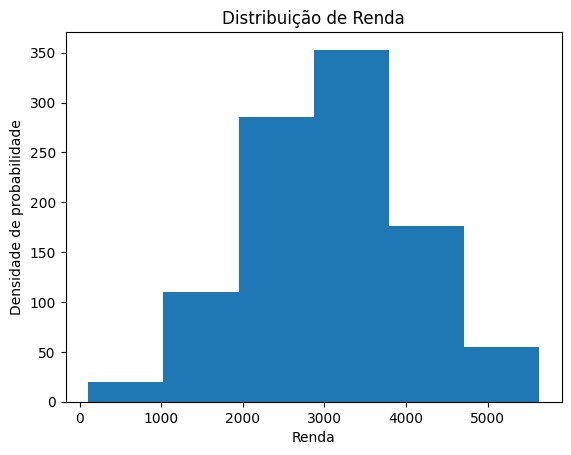

In [ ]:
media_renda = df['renda'].mean()
variancia_renda= df['renda'].var()

print(f'Média da renda: {media_renda}')
print("Variancia de renda:" , variancia_renda)
plt.hist(df['renda'], bins=6)
plt.title('Distribuição de Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de probabilidade')


6)
#usar um numero dentro de uma amostra maior =  binomial


In [ ]:
quant_pessoas
probabilidade_pos_graduacao = df[df.escolaridade == 'Pós-graduação']['escolaridade'].count()
#tamanho da amostra população brasileira com 1 milhão de habitante)
n = 1_000_000
#número de sucessos desejados  (243 mil pessoas com pós-graduação)
k = 243000
#calcular a probabilidade usando a distribuição binomial
probabilidade = stats.binom.pmf(k,n,0.253)

print(f'probabilidade de encontrarmos 243 mil pessoas com pós: {probabilidade}')




probabilidade de encontrarmos 243 mil pessoas com pós: 1.1104854289794913e-119


7)


função de densidade acumulada discreta :
  escolaridade
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: count, dtype: float64


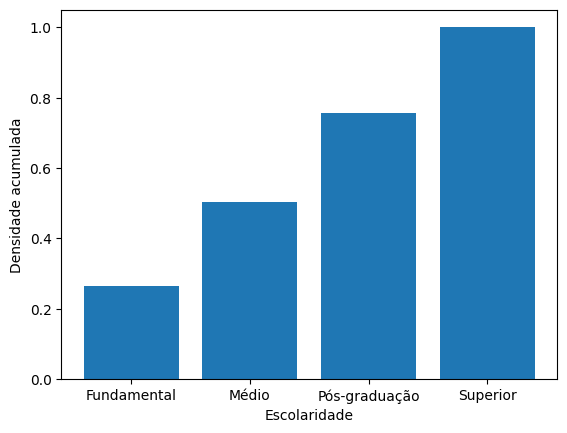

In [ ]:
cont_escolaridade = df['escolaridade'].value_counts().sort_index() #contando e agrupando essas escolaridades
frequencia_relativa = cont_escolaridade / len(df)
desnidade_acumulada = frequencia_relativa.cumsum()
print("função de densidade acumulada discreta :\n ", desnidade_acumulada)

plt.bar(desnidade_acumulada.index, desnidade_acumulada)
plt.xlabel('Escolaridade')
plt.ylabel('Densidade acumulada')
plt.show()

8)

In [ ]:
prop_intermediario = (df['nível de proficiência em inglês']== 'Intermediário').mean()
confianca = 0.95
z = stats.norm.ppf((1+confianca)/2)
#calcular margem de erro amostral
margem_erro = z((prop_intermediario * (1-prop_intermediario ))/ quant_pessoas) ** 0.5
print("margem de erro amostral para a proporção de pessoas com nível de ingles intermediario",margem_erro )

9)


In [ ]:
desvio_renda = df['renda'].std()
valor_referencia = media_renda + 1000

probabilidade_superior = 1 - stats.norm.cdf(valor_referencia, loc=media_renda, scale = df['renda'].std() )
k = 60
probabilidade_60_pessoas = stats.binom.pmf(k, quant_pessoas, probabilidade_superior)
print("probabilidade de encontrar 60 pessoas com uma renda mil reais superior a media:", probabilidade_60_pessoas)

probabilidade de encontrar 60 pessoas com uma renda mil reais superior a media: 1.159703840678535e-21


10)

In [ ]:
prob_10 = df[(df['escolaridade'] == 'Fundamental') & (df['estado'].isin(['SP','RJ','ES','MG'])) & (df['sexo'] == 'M') & (df['renda'] > 2000)]
prob_10


,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
155,155,ES,32,Fundamental,Intermediário,3615.94,M
163,163,ES,45,Fundamental,Básico,4049.01,M
205,205,ES,19,Fundamental,Avançado,3026.09,M
301,301,SP,50,Fundamental,Avançado,2786.01,M
505,505,SP,18,Fundamental,Básico,2961.49,M
524,524,MG,27,Fundamental,Intermediário,4148.77,M
612,612,RJ,19,Fundamental,Intermediário,2008.61,M
626,626,RJ,21,Fundamental,Intermediário,4022.57,M
680,680,ES,29,Fundamental,Intermediário,2164.65,M
732,732,MG,50,Fundamental,Intermediário,4091.31,M


In [ ]:
len(prob_10)/ 1000


0.019